<font color = green >

## Home Task: Implement K-means algorithm

</font>


In [499]:
import numpy as np
import matplotlib.pyplot as plt

<font color = green >

###  Data 

</font>



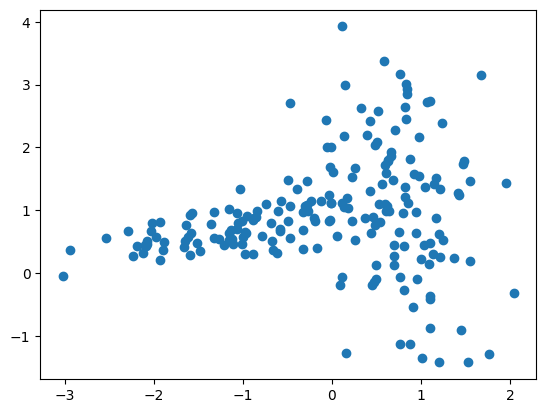

In [500]:
from sklearn.datasets import make_classification

X, _= make_classification(n_samples=200,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            random_state=0,
                            n_clusters_per_class=1,
                            class_sep = 0.8)
plt.figure()
plt.scatter  (X[:,0], X[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

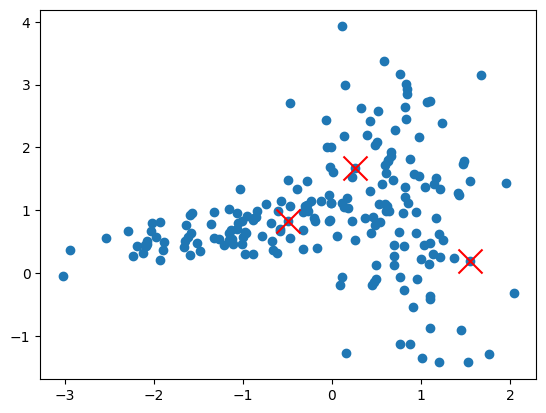

In [501]:
# 1. Initialize K centroids

def initialize_centroids(k: int, X: np.ndarray, *, random_seed: int=None):
    # X.shape = (m, n)
    # C.shape = (k, n)

    np.random.seed(seed=random_seed)
    C = X[np.random.choice(X.shape[0], k)]
    return C

C = initialize_centroids(3, X, random_seed=42)

def plot_centroids(C, X):
    plt.figure()
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(C[:,0], C[:,1], marker='x', s=300, c='red')

plot_centroids(C, X)

In [502]:
# 2. Assign every point to closest centroid
from sklearn.metrics.pairwise import euclidean_distances

def assign_centroids(C, X):
    # C.shape = (k, n)
    # X.shape = (m, n)
    # Diff.shape = (m, k)
    # Assign.shape = (m,)

    D = euclidean_distances(X, C)
    A = D.argmin(axis=1)
    return A

A = assign_centroids(C, X)
A

array([0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       1, 0], dtype=int64)

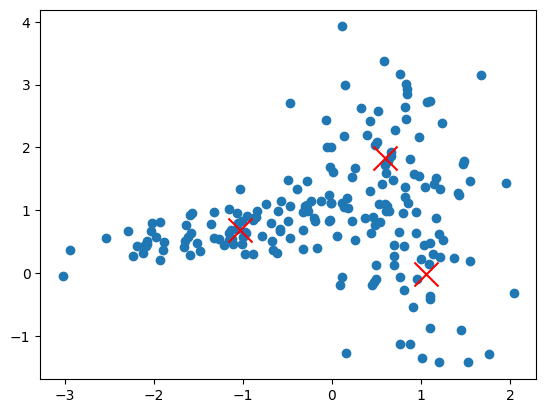

In [503]:
# 3. Compute new centroids as means of samples assigned to corresponding centroid

def compute_centroids(X, A):
    # X.shape = (m, n)
    # A.shape = (m,)
    # C.shape = (k, n)

    k = np.unique(A).shape[0]
    C = np.empty((k, X.shape[1]))
    for c in range(k):
        C[c] = X[A == c].mean(axis=0)

    return C

new_C = compute_centroids(X, A)
plot_centroids(new_C, X)


In [504]:
# 4. Implement cost J = np.mean(D**2) is distance from sample X to assigned centroid C

def compute_cost(X, C, A):
    # X.shape = (m, n)
    # C.shape = (k, n)
    # A.shape = (m,)
    # D.shape = (m,)

    centers = C[A]
    D = np.linalg.norm(X - centers, axis=1)
    J = np.mean(D**2)
    return J

J = compute_cost(X, C, A)
print(J)

new_A = assign_centroids(new_C, X)

new_J = compute_cost(X, new_C, new_A)
new_J

0.9545204023640256


0.6560929456005242

In [505]:
# 5. Iterate setps 2,3 till cost is stabile 

def kmeans(X, k, *, random_seed=None, max_iter=100, tol=1e-5):
    C = initialize_centroids(k, X, random_seed=random_seed)
    A = assign_centroids(C, X)
    J_prev = compute_cost(X, C, A)
    for _ in range(max_iter):
        C = compute_centroids(X, A)
        A = assign_centroids(C, X)
        J = compute_cost(X, C, A)
        if np.abs(J - J_prev) < tol:
            break
        J_prev = J
    return C, A, J

C, A, J = kmeans(X, 3, random_seed=42)


Final cost J = 0.6418923429534198


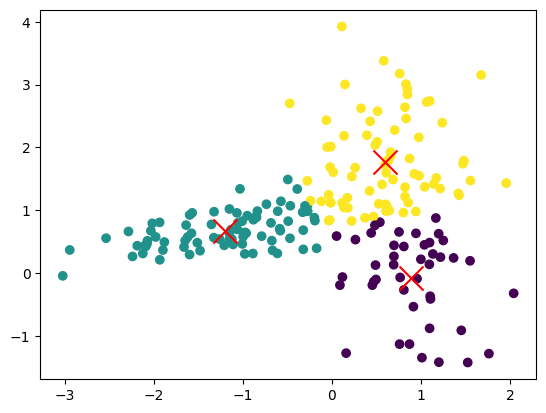

In [506]:
def visualize_clustering(X, A, C):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=A)
    plt.scatter(C[:,0], C[:,1], marker='x', s=300, c='red')

print('Final cost J =', J)
visualize_clustering(X, A, C)

In [507]:
# 6. Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

def kmeans_best(X, k, *, n_init=100, random_seed=None, max_iter=100, tol=1e-5):
    best_J = np.inf
    iter_seeds = np.random.randint(n_init*100, size=n_init)
    for i in range(n_init):
        np.random.seed(seed=random_seed)
        C, A, J = kmeans(X, k, random_seed=iter_seeds[i], max_iter=max_iter, tol=tol)
        if J < best_J:
            best_C, best_A, best_J = C, A, J
    return best_C, best_A, best_J

C, A, J = kmeans_best(X, 3, random_seed=42)

Final cost J = 0.6416951814622367


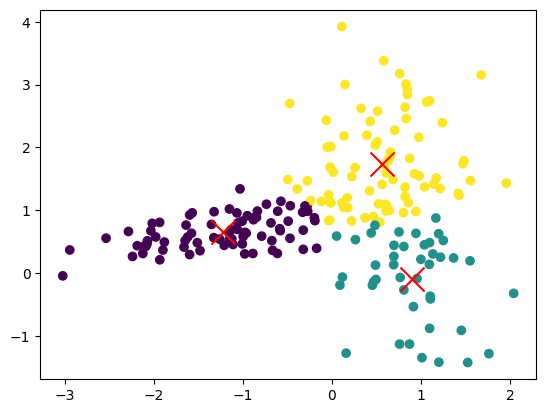

In [508]:
print('Final cost J =', J)
visualize_clustering(X, A, C)

Final cost for 4 clusters J = 0.4576916248652856


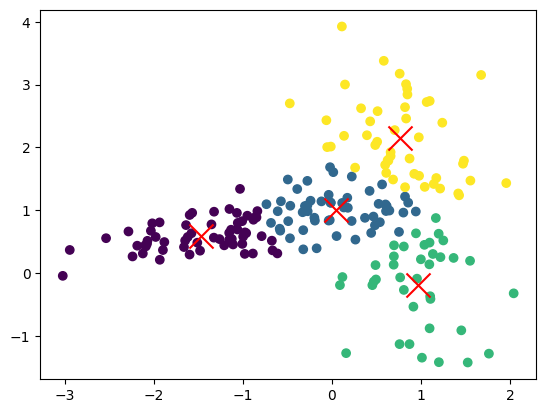

In [509]:
# 7. Visualize results (clusters, centroids) for K=4

C, A, J = kmeans_best(X, 4, random_seed=42)

print('Final cost for 4 clusters J =', J)
visualize_clustering(X, A, C)


<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow method to determine the best k for Kmeans


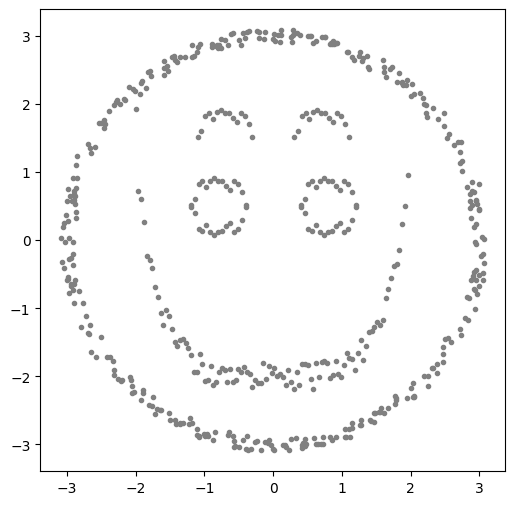

In [510]:
def get_smile_points(pos=True, n = 100):
    np.random.seed(42) 
    x_noise = np.random.uniform(-0.1,0.1,int(n*1.2))
    y_noise = np.random.uniform(-0.1,0.1,int(n*1.2))
    x= np.linspace (-3,3,n)
    x_add= np.linspace (-3,-2.9,int(n/10))

    x= np.r_[x,x_add, -x_add]
    y_circle = np.sqrt(9-x**2)+ y_noise

    X= np.r_[x+x_noise, x-x_noise]
    Y = np.r_[y_circle, -y_circle]

    x= np.linspace (-2,2,int(n/1.5))
    y_lips = -np.sqrt(16-x**2) +4.5 + 2*y_noise[:int(n/1.5)]
    X_smile= x
    Y_pos= -np.sqrt(16-x**4) +2 + 2*y_noise[:int(n/1.5)] 
    Y_neg= np.sqrt(16-x**2) - 4.5 + 2*y_noise[:int(n/1.5)]

    # X= np.r_[X,X_smile]
    # Y = np.r_[Y,Y_neg]

    x= np.linspace(-.4,.4,int(n/10))
    y_eye = np.sqrt(.17-x**2) - 0.05 + y_noise[:int(n/10)]

    X= np.r_[X,x-0.8,x-0.8, x+0.8, x+0.8 , x-0.7, x+0.7]
    Y = np.r_[Y,-y_eye+0.5, y_eye+0.5, -y_eye+0.5, y_eye+0.5, y_eye+1.5,  y_eye+1.5]

    X= np.r_[X,X_smile]
    Y_1 = np.r_[Y,Y_pos]
    Y_2 = np.r_[Y,Y_neg]
    if pos:
        return np.array(list((zip(X,Y_1))))
    else: 
        return np.array(list((zip(X,Y_2))))

plt.figure(figsize=(6,6))
points= get_smile_points(n=150)
plt.plot (points[:,0], points[:,1],'.',c= 'grey')



Text(0.5, 1.0, 'ward agglomerative')

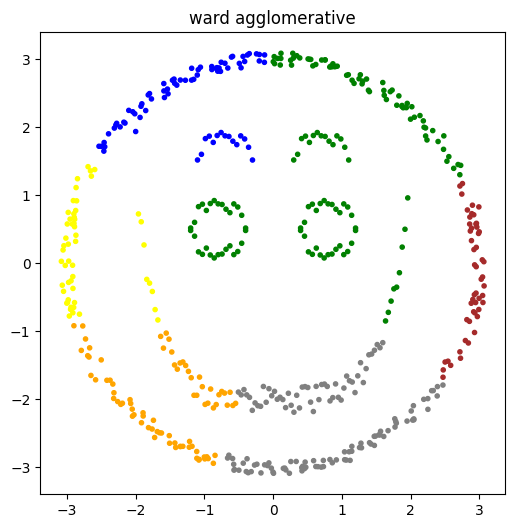

In [511]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=6, linkage='ward')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('ward agglomerative')

Text(0.5, 1.0, 'complete agglomerative')

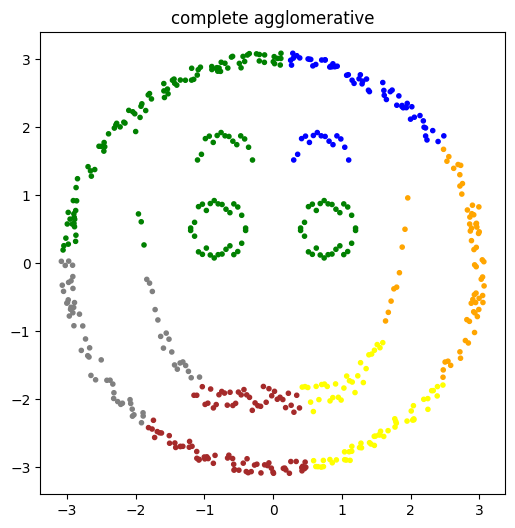

In [512]:
clf = AgglomerativeClustering(n_clusters=6, linkage='complete')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('complete agglomerative')

Text(0.5, 1.0, 'average agglomerative')

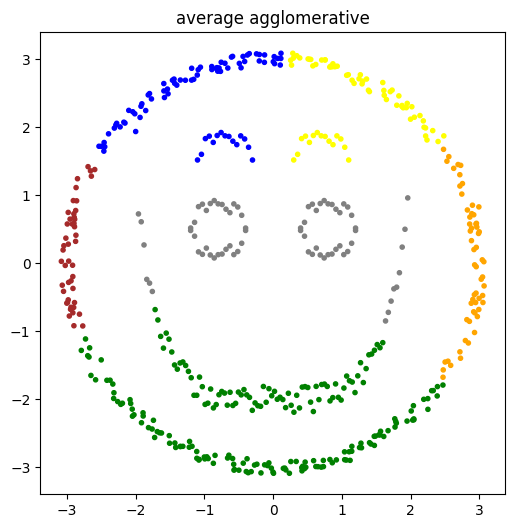

In [513]:
clf = AgglomerativeClustering(n_clusters=6, linkage='average')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('average agglomerative')

Text(0.5, 1.0, 'single agglomerative')

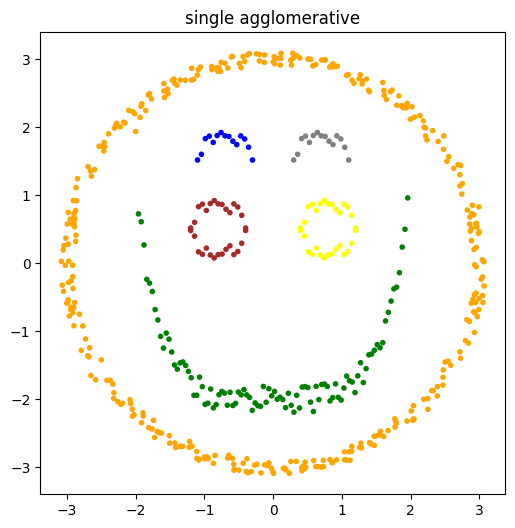

In [514]:
clf = AgglomerativeClustering(n_clusters=6, linkage='single')
predicted = clf.fit_predict(points)

plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow', 'pink', 'violet'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('single agglomerative')

Text(0.5, 1.0, 'DBSCAN')

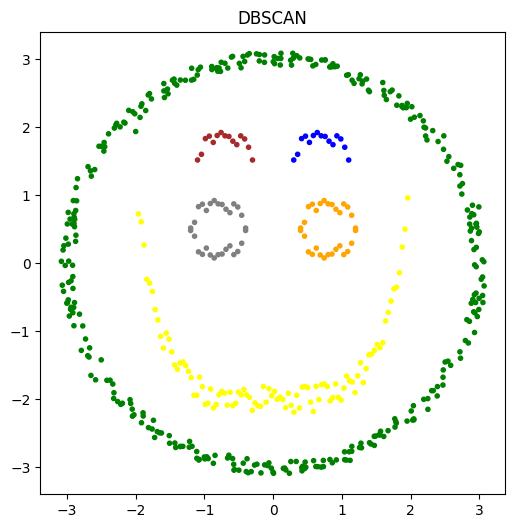

In [515]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.55, min_samples=2).fit(points)
predicted = dbscan.labels_

predicted[predicted == -1] = len(np.unique(predicted))-1


plt.figure(figsize=(6,6))
colors=  np.array(['green','grey', 'orange', 'brown', 'blue', 'yellow', 'pink', 'violet'])
plt.scatter(points[:,0], points[:,1], c= colors[predicted], marker= '.')    
plt.title ('DBSCAN')


1 : 1.2589242354917558
2 : 0.8832506962044162
3 : 0.7050320878533277
4 : 0.5996687153603514
5 : 0.5202013190432379
6 : 0.47456092437591396
7 : 0.41698500925942106
8 : 0.38953612457367504
9 : 0.3648066114091136


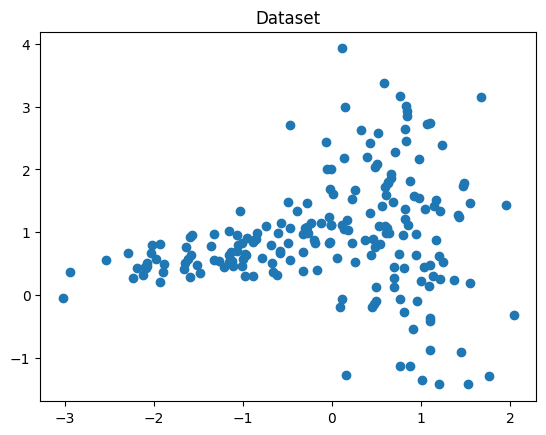

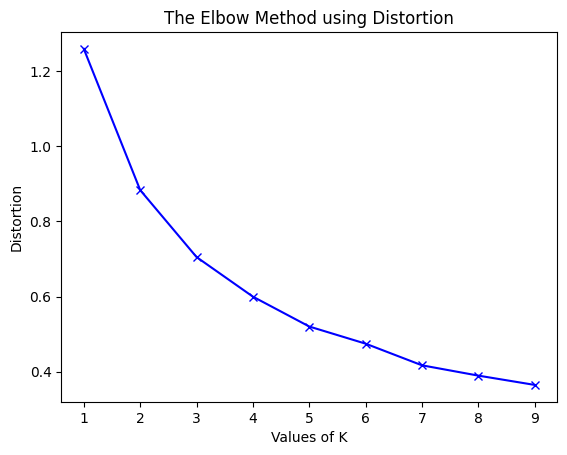

In [516]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
	print(f'{key} : {val}')

plt.plot()
plt.title('Dataset')
plt.scatter(X[:, 0], X[:, 1])
plt.show()

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 406.922663724203
2 : 223.97079448144794
3 : 128.3555432692471
4 : 91.53832497305712
5 : 68.10424013749319
6 : 56.1255188060082
7 : 45.0801606983417
8 : 39.463888716640234
9 : 35.366237517105745


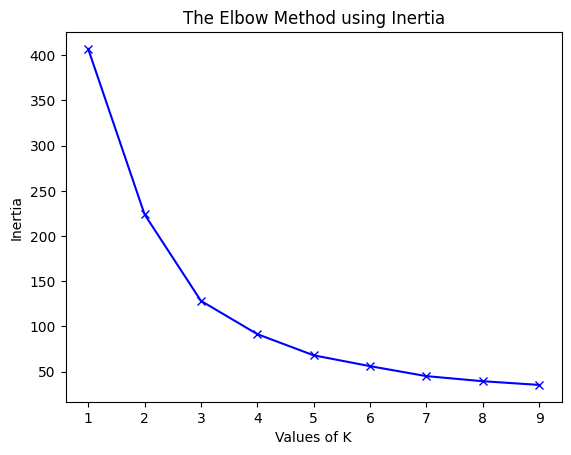

In [517]:
for key, val in mapping2.items():
	print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


**I would either choose 3 or 7 clusters depending on the goals.**